### Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#import pprint

### Load dataset

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
boston_dataset = load_boston()

In [ ]:

names = boston_dataset.feature_names
print(names)
print(boston_dataset.DESCR)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial hig

In [ ]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
boston['MEDV'] = boston_dataset.target

Exploratory Data Analysis

In [ ]:
## Count number of missing values for each feature
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


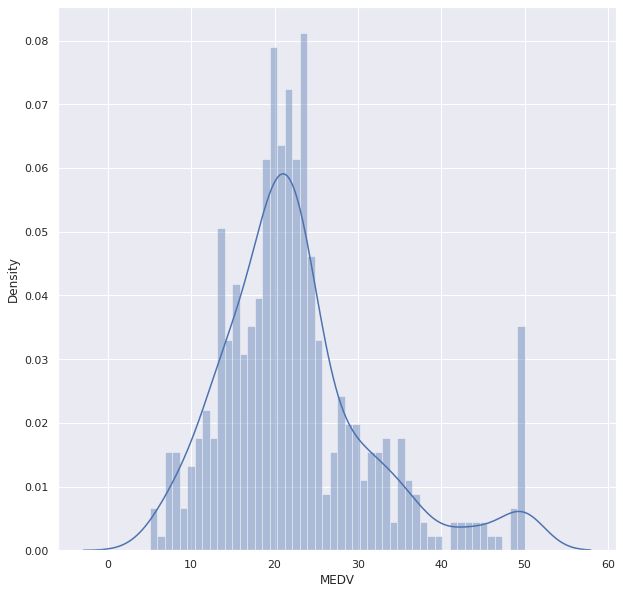

In [ ]:
## Distribution of the target variable
sns.set(rc={'figure.figsize':(10,10)})
sns.distplot(boston['MEDV'], bins=50)
plt.show()

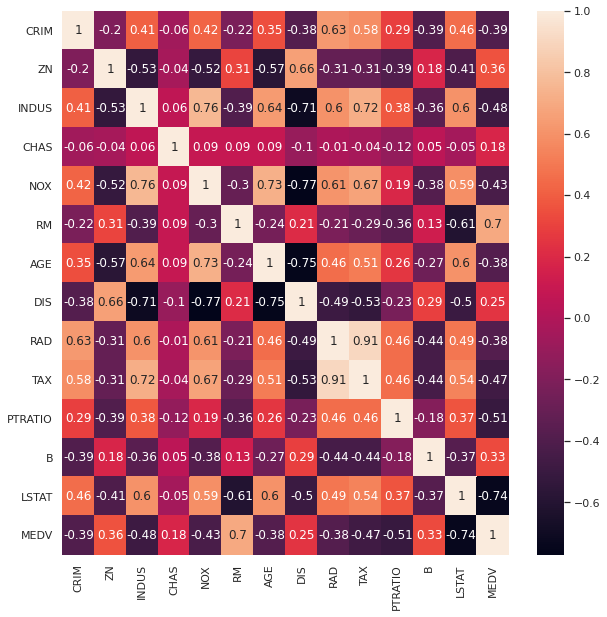

In [ ]:
## correlation matrix that measures the linear relationships between the variables
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

Train - test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


Linear Regression

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911


Linear Regression with all features

In [ ]:
X = pd.DataFrame(boston, columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B', 'LSTAT'])
Y = boston['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

(404, 13)
(102, 13)
(404,)
(102,)
The model performance for training set
--------------------------------------
RMSE is 4.741000992236517
The model performance for testing set
--------------------------------------
RMSE is 4.5682920423032


L1 Regression

In [ ]:
lasso = Lasso(alpha=.3)
lasso.fit(X_train, Y_train)

y_train_predict = lasso.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

# model evaluation for testing set
y_test_predict = lasso.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

The model performance for training set
--------------------------------------
RMSE is 4.886952292895106
The model performance for testing set
--------------------------------------
RMSE is 4.937144014406507


In [ ]:
for idx, each in enumerate(lasso.coef_):
    print("Weight of the feature {} is {}".format(names[idx], each))
    

Weight of the feature CRIM is -0.1144183085195929
Weight of the feature ZN is 0.05505842250809222
Weight of the feature INDUS is -0.018491543272814725
Weight of the feature CHAS is 0.0
Weight of the feature NOX is -0.0
Weight of the feature RM is 2.596069654405097
Weight of the feature AGE is 0.0018295214302064045
Weight of the feature DIS is -1.0777917635353527
Weight of the feature RAD is 0.3425471109665762
Weight of the feature TAX is -0.016096632891619844
Weight of the feature PTRATIO is -0.8217743549584748
Weight of the feature B is 0.011540810747268825
Weight of the feature LSTAT is -0.693673858596763


L2 Regression

In [ ]:
ridge = Ridge(alpha=.1)
ridge.fit(X_train, Y_train)

y_train_predict = ridge.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

# model evaluation for testing set
y_test_predict = ridge.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

The model performance for training set
--------------------------------------
RMSE is 4.741497694036713
The model performance for testing set
--------------------------------------
RMSE is 4.578178921884173


In [ ]:
for idx, each in enumerate(ridge.coef_):
    print("Weight of the feature {} is {}".format(names[idx], each))

Weight of the feature CRIM is -0.13033242258085778
Weight of the feature ZN is 0.04968829922400584
Weight of the feature INDUS is -0.004270625146717523
Weight of the feature CHAS is 2.6747902512635604
Weight of the feature NOX is -14.667040064902846
Weight of the feature RM is 3.4181961255047697
Weight of the feature AGE is 0.0002070573632005777
Weight of the feature DIS is -1.4735828271134839
Weight of the feature RAD is 0.36171340310189953
Weight of the feature TAX is -0.013294360142927506
Weight of the feature PTRATIO is -0.9396033937444134
Weight of the feature B is 0.01179172458887735
Weight of the feature LSTAT is -0.5964531100252581
